In [1]:
from adata.stock import Stock
%load_ext autoreload
%autoreload 2

/Users/Joel/Library/Python/3.7/lib/python/site-packages/urllib3/__init__.py:38: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  exceptions.NotOpenSSLWarning,


In [4]:
from database import Database
from crawler import Crawler, TiingoCrawlSource
from datetime import datetime
from backend import Backend
from cert import TiingoKey

import matplotlib.pyplot as plt
from frontend import Frontend


# Crawler



In [41]:

START_DATE = '2000-01-01'
END_DATE = datetime.today().strftime('%Y-%m-%d')
symbols = ['TSLA']


# Class-based usage
crawler = Crawler(TiingoCrawlSource(TiingoKey), quota_limit=20)
crawler.crawl(symbols, START_DATE, END_DATE, force=True)

✓ Crawler initialized with TiingoCrawlSource
✓ Data will be stored in: data/stock_data.pkl
📡 [Tiingo] Fetching data for TSLA from 2000-01-01 to 2025-09-26...
✓ [Tiingo] Successfully fetched 3835 days of data
📂 Data loaded: 337004 rows
✓ Database initialized: 337004 rows from data/stock_data.pkl
📊 Merged data: 333169 existing + 3835 new = 337004 total rows
💾 Database saved: 337004 rows to data/stock_data.pkl


# Database

In [3]:
# Initialize database
db = Database("data/stock_data.pkl")

# Explore what's available
print(f"Symbols: {db.get_symbols()}")
print(f"Date range: {db.get_date_range()}")

# Database overview
db.info()

📂 Data loaded: 337004 rows
✓ Database initialized: 337004 rows from data/stock_data.pkl
Symbols: ['AAL', 'AAPL', 'ABNB', 'AFRM', 'ALB', 'ALK', 'ALTM', 'AMZN', 'ARKQ', 'ATVI', 'AXP', 'BABA', 'BAC', 'BBY', 'BETZ', 'BIDU', 'BILI', 'BLNK', 'BND', 'BNKU', 'BYDDF', 'C', 'CRM', 'CURE', 'DAL', 'DASH', 'DDOG', 'DIDIY', 'DOCU', 'EBAY', 'EMQQ', 'FTEC', 'GOOG', 'GOOGL', 'GS', 'HOOD', 'HUYA', 'IAU', 'INTU', 'IQ', 'JD', 'JETS', 'JOYY', 'JPM', 'JTKWY', 'KNDI', 'LAC', 'LI', 'LUV', 'LYFT', 'MA', 'MDB', 'META', 'MPNGF', 'MS', 'MSFT', 'NDAQ', 'NFLX', 'NIO', 'NIU', 'NKLAQ', 'NVDA', 'ORCL', 'PCRFY', 'PDD', 'PINS', 'PLTR', 'PYPL', 'QQQ', 'QS', 'SAVEQ', 'SHOP', 'SMICY', 'SNAP', 'SNOW', 'SPY', 'TCEHY', 'TIGR', 'TLT', 'TMF', 'TSLA', 'TWTR', 'UAL', 'UBER', 'UPWK', 'V', 'VOO', 'VTI', 'VXUS', 'WFC', 'WORK', 'XIACF', 'XP', 'XPEV', 'XYZ', 'YQ', 'ZM']
Date range: {'start_date': '2000-01-03', 'end_date': '2025-09-25'}

📊 Database Info: data/stock_data.pkl
├── Total Records: 337,004
├── Symbols: 97 (AAL, AAPL, ABNB, A

In [19]:
db.get_split_history('TSLA')

,split_factor
date,
2020-08-31 00:00:00+00:00,5.0
2022-08-25 00:00:00+00:00,3.0


In [54]:
db.backfill_all_split_adjusted_prices()

Applying split adjustments to 97 symbols...
No splits for AAL
No splits for AAPL
No splits for ABNB
No splits for AFRM
No splits for ALB
No splits for ALK
No splits for ALTM
No splits for AMZN
No splits for ARKQ
No splits for ATVI
No splits for AXP
No splits for BABA
No splits for BAC
No splits for BBY
No splits for BETZ
No splits for BIDU
No splits for BILI
No splits for BLNK
No splits for BND
No splits for BNKU
No splits for BYDDF
No splits for C
No splits for CRM
No splits for CURE
No splits for DAL
No splits for DASH
No splits for DDOG
No splits for DIDIY
No splits for DOCU
No splits for EBAY
No splits for EMQQ
No splits for FTEC
No splits for GOOG
No splits for GOOGL
No splits for GS
No splits for HOOD
No splits for HUYA
No splits for IAU
No splits for INTU
No splits for IQ
No splits for JD
No splits for JETS
No splits for JOYY
No splits for JPM
No splits for JTKWY
No splits for KNDI
No splits for LAC
No splits for LI
No splits for LUV
No splits for LYFT
No splits for MA
No splits

In [49]:
df = db.query("TSLA")

In [50]:
db.get_split_history("TSLA")

,date,split_factor


# Backend

In [4]:
backend = Backend(Database("data/stock_data.pkl"))

📂 Data loaded: 337004 rows
✓ Database initialized: 337004 rows from data/stock_data.pkl
✓ Backend initialized with database-only access: data/stock_data.pkl


In [6]:
prices = backend.get_daily_price("TSLA", '2020-01-01', '2025-09-01')

📂 Retrieved 1423 days of data for TSLA from database


In [58]:
backend.get_date_range_for_symbol("META")

{'start_date': '2012-05-18', 'end_date': '2025-09-25'}

# FrontEnd

⚠️  Style 'seaborn-v0_8' not available, using default
✓ Frontend initialized with style: seaborn-v0_8
📂 Data loaded: 337004 rows
✓ Database initialized: 337004 rows from data/stock_data.pkl
✓ Backend initialized with database-only access: data/stock_data.pkl
📂 Retrieved 1423 days of data for SPY from database
📂 Retrieved 1423 days of data for AAPL from database
📂 Retrieved 1423 days of data for TSLA from database
📂 Retrieved 1423 days of data for GOOGL from database
📈 Plotting comparison chart for 4 symbols...

📊 Summary Statistics:
--------------------------------------------------
   SPY: Latest: $  645.05 | Min: $  222.95 | Max: $  648.92 | Avg: $  444.52
  AAPL: Latest: $  232.14 | Min: $   56.09 | Max: $  259.02 | Avg: $  161.39
  TSLA: Latest: $  333.87 | Min: $   24.08 | Max: $  479.86 | Avg: $  225.62
 GOOGL: Latest: $  212.91 | Min: $   52.71 | Max: $  212.91 | Avg: $  125.89
✓ Successfully created comparison chart for 4 symbols
💡 Hover over the lines to see detailed informati

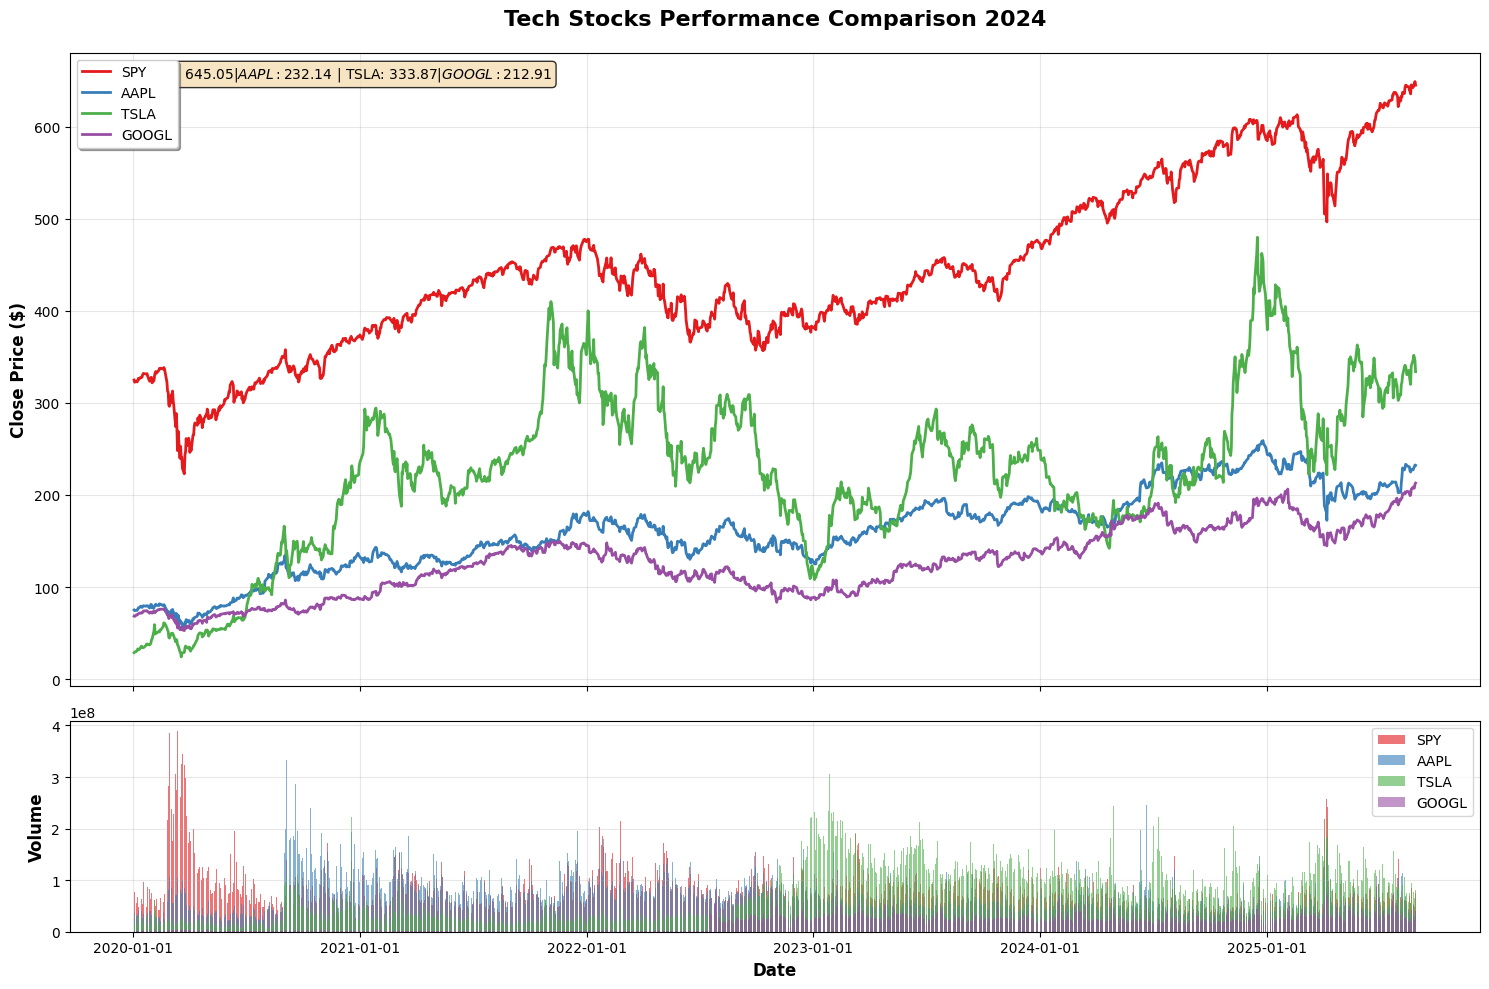

In [6]:

import matplotlib.pyplot as plt
from frontend import Frontend

# Initialize backend and frontend
frontend = Frontend()
backend = Backend(Database("data/stock_data.pkl"))

# Fetch data for multiple stocks
symbols = ['SPY', 'AAPL', 'TSLA', 'GOOGL']
dataframes = []

for symbol in symbols:
    df = backend.get_daily_price(symbol, '2020-01-01', '2025-09-01')
    dataframes.append(df)

# Create comparison plot
fig = frontend.plot_price_comparison(
    dataframes=dataframes,
    symbols=symbols,
    normalize=False,
    title='Tech Stocks Performance Comparison 2024'
)

plt.show()

# Main